In [1]:
#Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dataset=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
dataset=dataset.loc[::-1]
dataset.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [2]:
train_set=dataset.iloc[:,1:2].values
print(train_set)

[[122.1 ]
 [120.3 ]
 [121.8 ]
 ...
 [240.  ]
 [234.55]
 [234.05]]


In [3]:
train_set.shape


(2035, 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(train_set)
scaled_training_set

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [5]:
dataset.isnull().sum()


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

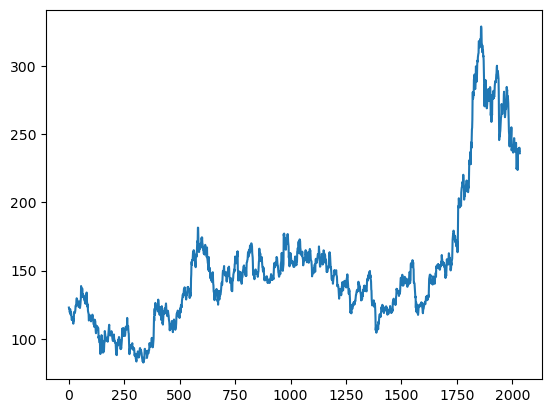

In [6]:
ds_high = dataset.reset_index()['High'] #reset the index back to the default 0, 1, 2 etc
plt.plot(ds_high)
plt.show()

In [7]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

sc = MinMaxScaler(feature_range= (0,1))
ds_high = sc.fit_transform(np.array(ds_high).reshape(-1,1))


In [8]:
train_size = int(len(ds_high)*0.75)
test_size = len(ds_high)-train_size

In [9]:

train_data = ds_high[0:train_size,:]
test_data = ds_high[train_size:len(ds_high),:1]

In [10]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [12]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

print("X train shape:",x_train.shape)
print("y train shape:",y_train.shape)

print("X test shape:",x_test.shape)
print("y test shape:",y_test.shape)from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LSTM

lstm = Sequential()
lstm.add(LSTM(50, return_sequences = True,input_shape = (100,1)))
lstm.add(LSTM(50,return_sequences = True))
lstm.add(LSTM(50))

lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error",optimizer = "adam")

X train shape: (1425, 100, 1)
y train shape: (1425,)
X test shape: (408, 100, 1)
y test shape: (408,)


In [13]:
#CREATING THE LSTM MODEL

In [14]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LSTM

lstm = Sequential()
lstm.add(LSTM(50, return_sequences = True,input_shape = (100,1)))
lstm.add(LSTM(50,return_sequences = True))
lstm.add(LSTM(50))

lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error",optimizer = "adam")

In [15]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
lstm.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 100,batch_size = 64,verbose = 1)


Epoch 1/100
23/23 [==============================] - 14s 224ms/step - loss: 0.0129 - val_loss: 0.0581
Epoch 2/100
23/23 [==============================] - 4s 163ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 3/100
23/23 [==============================] - 4s 171ms/step - loss: 8.3862e-04 - val_loss: 0.0030
Epoch 4/100
23/23 [==============================] - 4s 166ms/step - loss: 7.7877e-04 - val_loss: 0.0029
Epoch 5/100
23/23 [==============================] - 4s 163ms/step - loss: 7.4501e-04 - val_loss: 0.0032
Epoch 6/100
23/23 [==============================] - 4s 163ms/step - loss: 7.0338e-04 - val_loss: 0.0033
Epoch 7/100
23/23 [==============================] - 4s 162ms/step - loss: 6.6851e-04 - val_loss: 0.0041
Epoch 8/100
23/23 [==============================] - 4s 168ms/step - loss: 6.5126e-04 - val_loss: 0.0027
Epoch 9/100
23/23 [==============================] - 4s 165ms/step - loss: 6.2540e-04 - val_loss: 0.0053
Epoch 10/100
23/23 [==============================] - 4s 165ms

In [17]:
train_pred = lstm.predict(x_train)
test_pred = lstm.predict(x_test)

In [18]:
import math
math.sqrt(mean_squared_error(y_train,train_pred))

0.010581691091901962

In [19]:
math.sqrt(mean_squared_error(y_test,test_pred))

0.02935412290578566

In [20]:
#PLOTTING

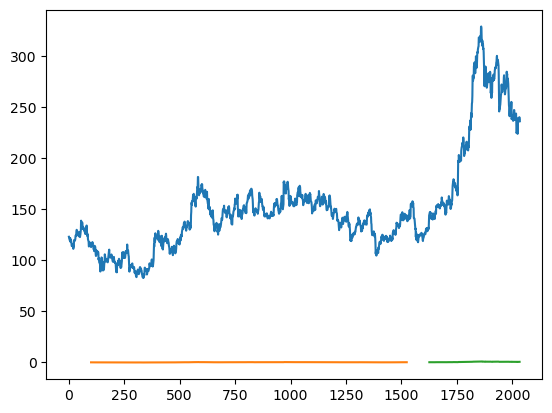

Green : Predicted data
Blue: Complete data
Orange: Train data


In [21]:
#shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(ds_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_pred) + look_back,:] = train_pred

#shift test prediction for plotting
testPredictPlot = np.empty_like(ds_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_pred) +  (look_back * 2)+1:len(ds_high) - 1, :] = test_pred

#plot baseline and predictions
plt.plot(sc.inverse_transform(ds_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green : Predicted data")
print("Blue: Complete data")
print("Orange: Train data")

In [22]:
len(test_data),x_test.shape #predict the next 28 days stock price


(509, (408, 100, 1))

In [23]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [24]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
nextNumberOfDays = 28
i = 0

while(i < 28):

    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6114057]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

In [25]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)
print("Day-new shape:",day_new.shape,"\nDay-pred shape:",day_pred.shape)

Day-new shape: (100,) 
Day-pred shape: (28,)


In [26]:
ds_new = ds_high.tolist()
ds_new.extend(lst_output)

len(ds_high)

2035

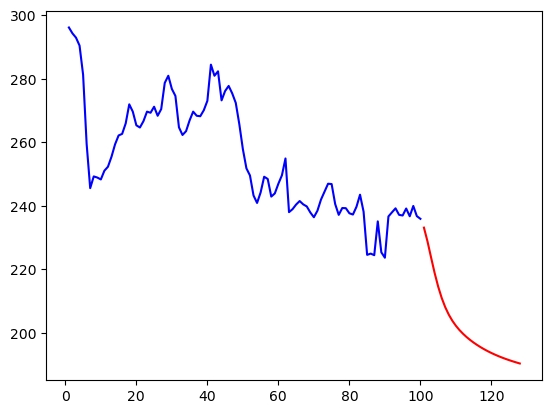

In [27]:
plt.plot(day_new,sc.inverse_transform(ds_high[1935:]),'b')
plt.plot(day_pred,sc.inverse_transform(lst_output),'r')
plt.show()

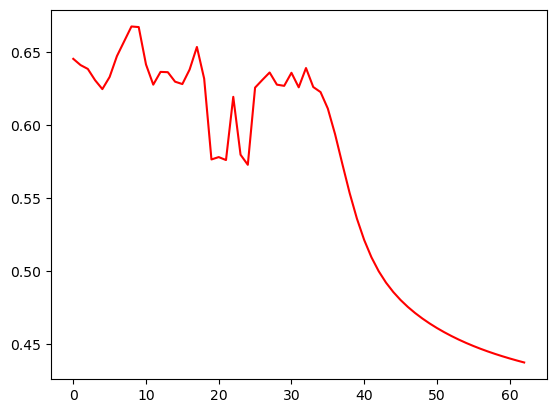

In [28]:
ds_new = ds_high.tolist()
ds_new.extend(lst_output)
plt.plot(ds_new[2000:],'r')
plt.show()

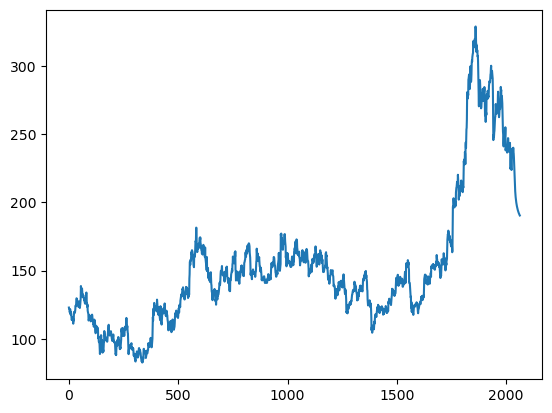

In [29]:
ds_new = sc.inverse_transform(ds_new).tolist()
plt.plot(ds_new)
plt.show()